# Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('PBL 5 recommendation data.csv', encoding = 'latin_1')

C:\Users\Kimberly\Anaconda3\envs\ComputerVision\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [4]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [5]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,NaN,NaN,...,5.0,NaN,NaN,Aluminum,NaN,NaN,NaN,PF04829,3.0,NaN
4193,3736,Michael,Kiernan,NaN,1463418049,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,Large,NaN,NaN,NaN,NaN,PF03816,3.0,NaN


In [6]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.customer_id                   0
Orders.fname                         0
Orders.lname                         0
Orders.company                    3466
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep         

### Splitting dataframe into dataframes for customer, order, and product

In [7]:
#Extracting data for Customer dataframe
customer_df = df.iloc[:,:15]
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 15 columns):
Customers.id               4194 non-null int64
Customers.fname            4194 non-null object
Customers.lname            4194 non-null object
Customers.company          727 non-null object
Customers.create_date      4194 non-null int64
Customers.status           101 non-null float64
Customers.mailing          2114 non-null float64
Customers.reminders        0 non-null float64
Customers.tax_exempt       5 non-null float64
Customers.account_id       3 non-null float64
Customers.sales_rep        0 non-null float64
Customers.rewards          0 non-null float64
Customers.profile_id       0 non-null float64
Customers.last_modified    4194 non-null int64
Customers.customer_type    3771 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 491.6+ KB


In [8]:
#Extracting data for Order dataframe
order_df = df.iloc[:, 15:83]
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 68 columns):
Orders.id                        4194 non-null int64
Orders.customer_id               4194 non-null int64
Orders.fname                     4194 non-null object
Orders.lname                     4194 non-null object
Orders.company                   728 non-null object
Orders.order_number              4194 non-null object
Orders.reorder_id                82 non-null float64
Orders.external_source           365 non-null object
Orders.external_id               5 non-null float64
Orders.currency                  4194 non-null object
Orders.sales_rep                 0 non-null float64
Orders.subtotal                  4194 non-null float64
Orders.tax                       3737 non-null float64
Orders.shipping                  3999 non-null float64
Orders.coupon_id                 882 non-null float64
Orders.coupon_amount             882 non-null float64
Orders.gift_id                   0 

In [9]:
#Extracting data for Product Dataframe
product_df = df.iloc[:, 83:181]
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 98 columns):
Products.id                       4037 non-null float64
Products.status                   4037 non-null float64
Products.product_type             0 non-null float64
Products.template                 3973 non-null object
Products.vendor                   4037 non-null float64
Products.import_id                4037 non-null float64
Products.name                     4037 non-null object
Products.display_name             3662 non-null object
Products.menu_name                0 non-null float64
Products.list_price               4017 non-null float64
Products.price                    4036 non-null float64
Products.sale_price               1160 non-null float64
Products.cost                     4037 non-null float64
Products.flags                    2987 non-null float64
Products.left_flag                1239 non-null float64
Products.right_flag               0 non-null float64
Products.

### Exporting the dataframes into SQL

In [10]:
import sqlite3

conn = sqlite3.connect('customer_seg.db')

customer_df.to_sql('customer', conn)
product_df.to_sql('product', conn)
order_df.to_sql('orders', conn)

### Importing the dataframes from SQL 

In [11]:
#Importing in Customer data from SQL
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 15)
customer_query = "SELECT * FROM customer"
customer_data = pd.read_sql(customer_query,conn)
customer_data.head()

,index,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,...,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type
0,0,797,Christy,Dill,Company0,1426018724,NaN,...,NaN,NaN,None,None,None,1437764306,0.0
1,1,3,John,Smith,Company1,1386089139,NaN,...,NaN,NaN,None,None,None,1437764354,0.0
2,2,3,John,Smith,Company1,1386089139,NaN,...,NaN,NaN,None,None,None,1437764354,0.0
3,3,4,James,Anderson,None,1386780263,NaN,...,NaN,NaN,None,None,None,1437762646,0.0
4,4,5,Abraham,Pollak,Company3,1386861599,0.0,...,NaN,NaN,None,None,None,1437764316,0.0


In [12]:
#Importing in Product data from SQL
product_query = "SELECT * FROM product"
product_data = pd.read_sql(product_query,conn)
product_data.head()

,index,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,...,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,0,2310.0,0.0,None,sub-product-detail.html,1.0,3.0,...,None,None,None,None,PF61071,0.0,None
1,1,177.0,1.0,None,sub-product-detail.html,1.0,3.0,...,None,None,None,None,PF02132,NaN,None
2,2,1.0,0.0,None,sub-product-detail.html,1.0,3.0,...,Nitrile,None,None,None,PF00342,0.0,None
3,3,983.0,0.0,None,sub-product-detail.html,1.0,3.0,...,None,None,None,None,PF04970,NaN,None
4,4,991.0,1.0,None,sub-product-detail.html,1.0,3.0,...,None,None,None,None,PF03045,NaN,None


In [13]:
#Importing in Order data from SQL
order_query = "SELECT * FROM orders"
order_data = pd.read_sql(order_query,conn)
order_data.head()

,index,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,...,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags
0,0,3758,797,Christy,Dill,Company0,3758,...,57.20,44.00,None,None,NaN,None,NaN
1,1,23,3,John,Smith,Company1,23,...,5.00,1.87,None,None,NaN,None,2.0
2,2,9531,3,John,Smith,Company1,9531,...,68.78,52.50,None,None,NaN,None,NaN
3,3,29,4,James,Anderson,None,29,...,19.56,12.62,None,None,NaN,None,NaN
4,4,30,5,Abraham,Pollak,Company3,30,...,36.05,25.75,None,None,NaN,None,NaN


In [14]:
#Dropping indexes in dataframes
customer_data.drop('index', axis = 1, inplace = True)
product_data.drop('index', axis = 1, inplace = True)
order_data.drop('index', axis = 1, inplace = True)

### Data Cleaning/Preparation

In [15]:
#Dropping columns with less than 75% of filled cells
customer_data.dropna(axis = 1, thresh = 0.75*len(customer_data), inplace = True)
product_data.dropna(axis = 1, thresh = 0.75*len(product_data), inplace = True)
order_data.dropna(axis = 1, thresh = 0.75*len(order_data), inplace = True)

In [16]:
#Matching Customer IDs that exist in both Customer and Order dataframes
customer_data['Customers.id'].isin(order_data['Orders.customer_id']).value_counts()

True    4194
Name: Customers.id, dtype: int64

In [17]:
#Lower-casing customer's first and last name in both Customer and Order dataframes
col = ['fname', 'lname']

for c in col:
    customer_data['Customers.'+c] = customer_data['Customers.'+c].apply(lambda x: x.lower())
    order_data['Orders.'+c] = order_data['Orders.'+c].apply(lambda x: x.lower())

In [18]:
#Matching customer's first and last name and customer type that exist in both Customer and Order dataframes
columns = ['fname', 'lname', 'customer_type']
sum_value = []

for col in columns:
    total = customer_data[('Customers.' + col)].isin(order_data[('Orders.' + col)]).sum()
    sum_value.append(total)
sum_value

[4189, 4176, 4194]

In [19]:
#Checking if status in Order dataframe matches with that in Products dataframe
order_data['Orders.status'].isin(product_data['Products.status']).value_counts()

True     4118
False      76
Name: Orders.status, dtype: int64

In [20]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 30 columns):
Products.id                      4037 non-null float64
Products.status                  4037 non-null float64
Products.template                3973 non-null object
Products.vendor                  4037 non-null float64
Products.import_id               4037 non-null float64
Products.name                    4037 non-null object
Products.display_name            3662 non-null object
Products.list_price              4017 non-null float64
Products.price                   4036 non-null float64
Products.cost                    4037 non-null float64
Products.last_modified           4037 non-null float64
Products.shopping_brand          4032 non-null object
Products.shopping_mpn            4034 non-null object
Products.shopping_flags          3917 non-null float64
Products.amazon_item_type        4015 non-null object
Products.google_shopping_id      3780 non-null object
Products.google_shop

In [21]:
#Merging Customer, Order and Product dataframes
cust_order = customer_data.merge(order_data, left_index = True, right_index = True)
df = cust_order.merge(product_data, left_index = True, right_index = True)
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,...,Products.unit,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
0,797,christy,dill,1426018724,1437764306,0.0,3758,...,EA,E0149 +E0156,24.80,7.50,30.40,PF61071,0.0
1,3,john,smith,1386089139,1437764354,0.0,23,...,EA,A4357,8.00,7.00,1.50,PF02132,NaN
2,3,john,smith,1386089139,1437764354,0.0,9531,...,CS,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,13.23,10.04,10.24,PF00342,0.0
3,4,james,anderson,1386780263,1437762646,0.0,29,...,EA,A9270,10.60,7.80,18.50,PF04970,NaN
4,5,abraham,pollak,1386861599,1437764316,0.0,30,...,EA,E0730,8.50,2.75,12.00,PF03045,NaN


In [22]:
pd.set_option('display.max_columns', 500)
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
0,797,christy,dill,1426018724,1437764306,0.0,3758,797,christy,dill,3758,USD,57.20,0.0,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,1.463163e+09,MEDLINE,MDS86850EGS,62.0,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000064C-1434298761,1.450325e+09,"<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,E0149 +E0156,24.80,7.50,30.40,PF61071,0.0
1,3,john,smith,1386089139,1437764354,0.0,23,3,john,smith,23,USD,20.00,NaN,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.0,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,MEDLINE,DYNC1674H,62.0,health-care-products,None,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,80008C35-1438901283,1.450322e+09,<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,A4357,8.00,7.00,1.50,PF02132,NaN
2,3,john,smith,1386089139,1437764354,0.0,9531,3,john,smith,9531,USD,68.78,0.0,9.95,78.73,manual,0|Standard Shipping,None,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,1.463163e+09,MEDLINE,484805,62.0,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800087BB-1438898332,1.450321e+09,<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,13.23,10.04,10.24,PF00342,0.0
3,4,james,anderson,1386780263,1437762646,0.0,29,4,james,anderson,29,USD,19.56,0.0,9.95,29.55,None,11|Ground,7.96468E+14,3.0,1.386780e+09,None,29.55,None,None,1,1386780263,1.440529e+09,1.386800e+09,0.0,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,983.0,0.0,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,2

In [23]:
#Calculating the shipping volume in Products dataframe
df['Products.shipping_volume'] = df['Products.shipping_length']*df['Products.shipping_height']*df['Products.shipping_width']

#Dropping shipping length, width and height as the volume is already calculated
df.drop(['Products.shipping_length', 'Products.shipping_width', 'Products.shipping_height'], axis = 1, inplace = True)

In [24]:
#Pulling indices where the first name in Customer dataframe does not match that in Order dataframe
df.index[df['Customers.fname'] != df['Orders.fname']]

Int64Index([   5,  102,  540,  541,  861,  945, 1124, 1380, 1381, 1382, 1383,
            1384, 1533, 1534, 1535, 1536, 1537, 2028, 2198, 2419, 2543, 2983,
            3046, 3047, 3246, 3465, 3658, 3716, 3717, 3967, 3998],
           dtype='int64')

In [25]:
#Viewing index 102 to see mismatch in first and last name and customer id
df[['Customers.id', 'Orders.customer_id', 'Customers.fname', 'Orders.fname', 'Customers.lname', 'Orders.lname']].iloc[102]

Customers.id                100
Orders.customer_id          100
Customers.fname         arlene 
Orders.fname               luis
Customers.lname       maldonado
Orders.lname           moriel.a
Name: 102, dtype: object

In [26]:
#Dropping duplicated or unnecessary data
df.drop(['Orders.id', 'Orders.customer_id', 'Orders.fname', 'Orders.lname', 'Orders.order_number', 'Orders.subtotal', 'Orders.tax',
        'Orders.shipping', 'Orders.shipping_carrier', 'Orders.shipping_method', 'Orders.payment_amount', 'Orders.payment_id',
        'Orders.customer_type', 'Order_Items.cost', 'Products.cost'], axis = 1, inplace = True)

In [27]:
#Checking to see how many different types of currency were recorded
df['Orders.currency'].nunique()

1

In [28]:
#Lower-casing the names of products
df['Order_Items.product_name'] = df['Order_Items.product_name'].apply(lambda x: x.lower())

In [29]:
#Dropping more duplicated or unnecessary attributes
df.drop(['Orders.currency','Products.id', 'Products.status', 'Products.template', 'Products.vendor', 'Products.import_id', 'Products.name',
       'Products.display_name', 'Products.list_price', 'Products.price', 'Products.hcpcs', 'Products.family_id'], 
       axis = 1, inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 38 columns):
Customers.id                     4194 non-null int64
Customers.fname                  4194 non-null object
Customers.lname                  4194 non-null object
Customers.create_date            4194 non-null int64
Customers.last_modified          4194 non-null int64
Customers.customer_type          3771 non-null float64
Orders.total                     4194 non-null float64
Orders.tracking                  3818 non-null object
Orders.payment_status            4189 non-null float64
Orders.payment_date              4176 non-null float64
Orders.payment_type              3810 non-null object
Orders.payment_code              3446 non-null object
Orders.status                    4194 non-null int64
Orders.placed_date               4194 non-null int64
Orders.updated_date              4171 non-null float64
Orders.shipped_date              3848 non-null float64
Order_Items.id              

In [31]:
#Separating duplicated Customer IDs from those not duplicated into 2 dataframes b/c this indicates that those with
#duplicated IDs have made more than 1 purchase, whereas those in the dataframe of no duplicated IDs only made single purchase
df_dup = df[df['Customers.id'].duplicated(keep = False)]
df_sing = df.drop(df_dup.index, axis = 0)

In [32]:
#Creating a dataframe of number of repeats per Customer Id
num_purch = pd.DataFrame(df_dup['Customers.id'].value_counts()).reset_index()
num_purch.rename(columns = {'index':'Customers.id', 'Customers.id':'Num_Purchases'}, inplace = True)
num_purch['Num_Purchases'] = num_purch['Num_Purchases'].apply(lambda x: x + 1)

#df_sing['Num_Purchases'] = 1
#Merging number of purchases dataframe to dataframe with duplicated IDs
df_dup = df_dup.merge(num_purch, on = 'Customers.id')
df = df_dup.append(df_sing, sort = False)

#Filling the nulls in Num_Purchases attributes to 0
df['Num_Purchases'].fillna(1, inplace = True)

In [33]:
#Getting current timestamp
import datetime

today = datetime.datetime.today()

In [34]:
#Creating dataframe that captures the most recent orders made
df_latest = df.groupby(['Customers.id', 'Num_Purchases', 'Customers.create_date', 
                       'Customers.last_modified']).agg({'Orders.placed_date':'last', 'Orders.total':'sum'}).reset_index()

In [35]:
#Getting datetime from date attributes
df_latest['Orders.placed_date'] = df_latest['Orders.placed_date'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df_latest['Customers.create_date'] = df_latest['Customers.create_date'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df_latest['Customers.last_modified'] = df_latest['Customers.last_modified'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [36]:
df_latest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Data columns (total 6 columns):
Customers.id               3054 non-null int64
Num_Purchases              3054 non-null float64
Customers.create_date      3054 non-null datetime64[ns]
Customers.last_modified    3054 non-null datetime64[ns]
Orders.placed_date         3054 non-null datetime64[ns]
Orders.total               3054 non-null float64
dtypes: datetime64[ns](3), float64(2), int64(1)
memory usage: 143.3 KB


In [37]:
#Subtracting the last dates of purchase, create_date, and last_modified from today's date
df_latest['Days_since_last_order'] = today - df_latest['Orders.placed_date'] 
df_latest['Days_since_created'] = today - df_latest['Customers.create_date'] 
df_latest['Days_since_modified'] = today - df_latest['Customers.last_modified']

In [38]:
df_latest.head()

,Customers.id,Num_Purchases,Customers.create_date,Customers.last_modified,Orders.placed_date,Orders.total,Days_since_last_order,Days_since_created,Days_since_modified
0,3,3.0,2013-12-03 08:45:39,2015-07-24 11:59:14,2015-12-08 11:40:52,108.72,1573 days 01:17:36.518714,2308 days 04:12:49.518714,1710 days 00:59:14.518714
1,4,1.0,2013-12-11 08:44:23,2015-07-24 11:30:46,2013-12-11 08:44:23,29.55,2300 days 04:14:05.518714,2300 days 04:14:05.518714,1710 days 01:27:42.518714
2,5,4.0,2013-12-12 07:19:59,2015-07-24 11:58:36,2014-09-10 08:40:55,124.99,2027 days 04:17:33.518714,2299 days 05:38:29.518714,1710 days 00:59:52.518714
3,7,1.0,2013-12-27 06:52:27,2015-07-24 11:46:57,2013-12-27 06:52:27,49.14,2284 days 06:06:01.518714,2284 days 06:06:01.518714,1710 days 01:11:31.518714
4,8,1.0,2014-01-09 13:33:36,2015-07-24 11:43:41,2014-01-09 13:33:36,69.70,2270 days 23:24:52.518714,2270 days 23:24:52.518714,1710 days 01:14:47.518714


In [40]:
#Creating new dataframe with the following attributes
df_seg = df[['Customers.id', 'Orders.total', 'Order_Items.id', 'Order_Items.parent',
            'Order_Items.product_name', 'Order_Items.qty', 'Order_Items.price', 'Products.shopping_brand', 'Products.unit']]

In [41]:
#Filling in null cells with the mode
df_seg['Products.shopping_brand'].fillna(df_seg['Products.shopping_brand'].mode()[0], inplace = True)
df_seg['Products.unit'].fillna(df_seg['Products.unit'].mode()[0], inplace = True)

C:\Users\Kimberly\Anaconda3\envs\ComputerVision\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Data Visualization

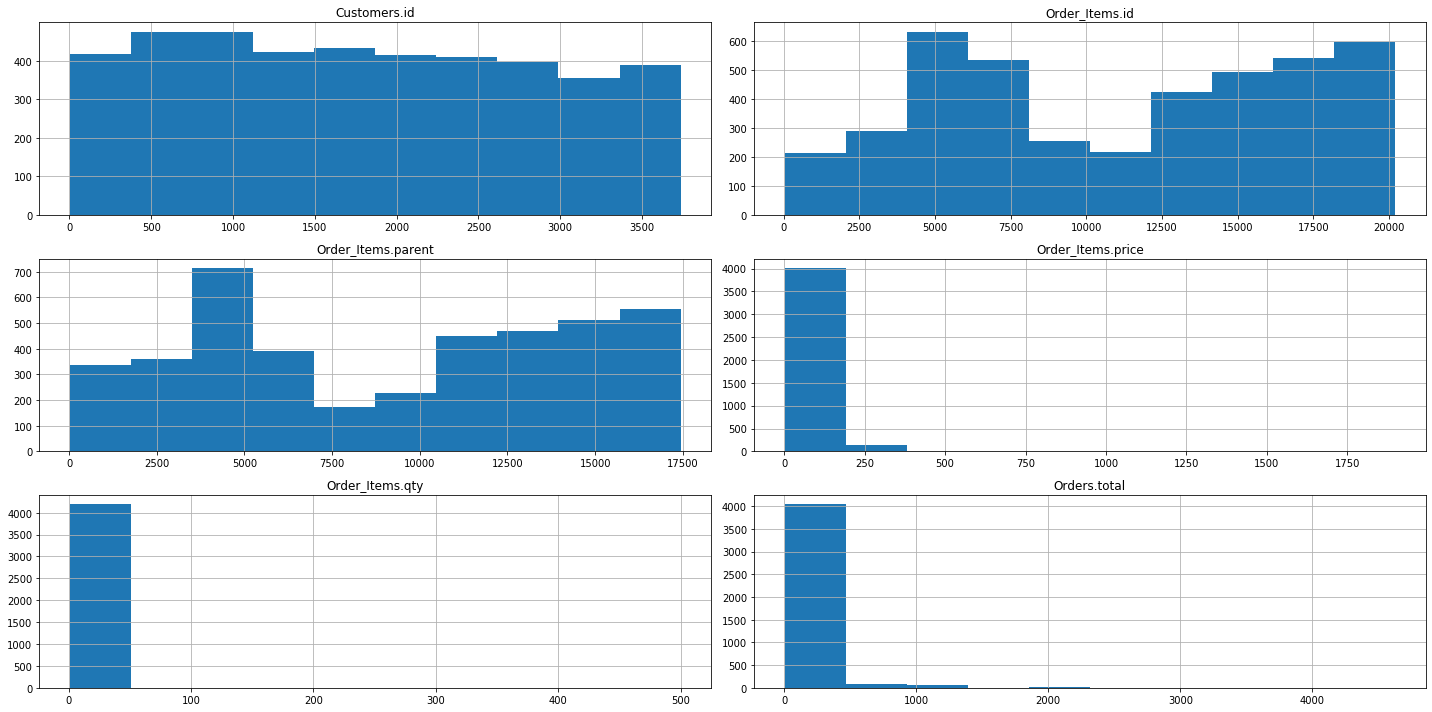

In [42]:
df_seg.hist(figsize = (20, 10))
plt.tight_layout()
plt.show();

In [43]:
#Getting sparse matrix for dataframe
X = pd.get_dummies(df_seg, drop_first = True)

In [44]:
X.head()

,Customers.id,Orders.total,Order_Items.id,Order_Items.parent,Order_Items.qty,Order_Items.price,Order_Items.product_name_1 box of medline commode liners with absorbent pad,Order_Items.product_name_1 pad of curad mediplast wart pad,"Order_Items.product_name_1-ply blockade angelstat surgical gowns, ceil blue, extra large","Order_Items.product_name_1/2"" self-adhesive hook material, 25 yard dispenser box, white","Order_Items.product_name_1/2"" self-adhesive loop material, 25 yard dispenser box, white","Order_Items.product_name_100% cotton unisex reversible hyperbaric scrub tops, misty green, mzs","Order_Items.product_name_100% cotton unisex reversible tops, ceil blue, mhs",Order_Items.product_name_10215-s,Order_Items.product_name_12112-3,Order_Items.product_name_12124-3,"Order_Items.product_name_18"" hamper stands, standard","Order_Items.product_name_19"" flyweight lightweight blue transport wheelchair","Order_Items.product_name_2"" self-adhesive loop material, 10 yard dispenser box, tan","Order_Items.product_name_2"" self-adhesive loop material, 25 yard dispenser box, tan","Order_Items.product_name_2-ply tissue/poly professional towels, white, not applicable",Order_Items.product_name_2000 extra-wide wheelchairs,Order_Items.product_name_2000 wheelchairs,"Order_Items.product_name_24 hour urine collection bottle, 3000.0 ml","Order_Items.product_name_3 pack, hospital receiving blankets, baby blankets, 100% cotton, 30x40, elephant","Order_Items.product_name_3 pack, hospital receiving blankets, baby blankets, 100% cotton, 34x40, footprints",Order_Items.product_name_3 wheel flame blue rollator walker with basket tray and pouch,Order_Items.product_name_3 wheel flame red rollator walker with basket tray and pouch,"Order_Items.product_name_3 wheel walker rollator with basket tray and pouch, flame blue","Order_Items.product_name_3 wheel walker rollator with basket tray and pouch, flame red","Order_Items.product_name_3"" wheels for walkers","Order_Items.product_name_3/4"" guardian utility tips, gray","Order_Items.product_name_4-panel abdominal binders, 2x-large","Order_Items.product_name_4-panel abdominal binders, large/x-large","Order_Items.product_name_5"" wheels for walkers","Order_Items.product_name_6 cylinder oxygen carrier, m9 cylinders",Order_Items.product_name_6' cpap tube,Order_Items.product_name_6-spring hand grip (each),Order_Items.product_name_6291hda universal wheels part,"Order_Items.product_name_8"" rear walker wheel attachment","Order_Items.product_name_a&d ointment by h & h laboratories inc, 384.00 ml",Order_Items.product_name_accu-therm hot/cold gel packs,Order_Items.product_name_accu-therm insulated hot pack,Order_Items.product_name_accu-therm non-insulated hot pack,"Order_Items.product_name_accutouch chemo nitrile exam gloves, blue, medium","Order_Items.product_name_active liquid protein nutritional supplement, 0.0","Order_Items.product_name_active liquid protein nutritional supplement, 30.000 oz",Order_Items.product_name_acuforce&reg; 7.0 massage tool,Order_Items.product_name_adaptive eating utensils - adaptive fork,Order_Items.product_name_addipak sterile saline solution,Order_Items.product_name_adjustable angle rotating suction cup grab bar,Order_Items.product_name_adjustable height armrest ak5adjarmkit,Order_Items.product_name_adjustable height bathtub grab bar safety rail,Order_Items.product_name_adjustable height home bed assist handle,"Order_Items.product_name_adjustable height rollator with 6"" wheels, red","Order_Items.product_name_adjustable height teak bath bench stool, rectangular","Order_Items.product_name_adjustable height teak bath bench stool, triangular",Order_Items.product_name_adjustable height triangular teak bath bench stool,"Order_Items.product_name_adjustable lightweight folding cane with gel hand grip, black","Order_Items.product_name_adjustable lightweight folding cane with gel hand grip, blue crackle","Order_Items.product_name_adjustable lightweight folding cane with gel hand grip, red crackle",O

### Predicting clusters

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [46]:
#Function to find optimal k using elbow method
def cluster(data):
    distortion = []
    K = range(1,11)

    for k in K:
        model = KMeans(n_clusters = k).fit(data)
        model.fit(data)
        distortion.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
        
    plt.plot(K, distortion, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

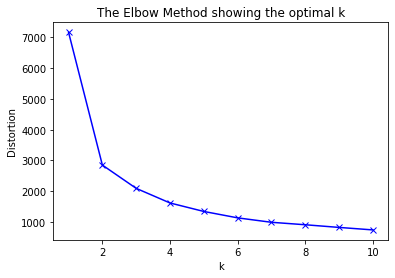

In [47]:
#Finding optimal k for dataframe
cluster(X)

In [48]:
#Fitting and predicting model based on optimal k
model = KMeans(n_clusters = 2)
model = model.fit(X)
pred = model.predict(X)

In [49]:
#Silhouete score for prediction
silhouette_score(X,pred)

0.7003982127011615

Creating an RFM (Recency, Frequency, and Monetary) table

In [50]:
#Dataframe for RFM
df_latest = df_latest[['Customers.id', 'Num_Purchases', 'Days_since_last_order', 'Orders.total' ]]

In [51]:
#Converting Days_since_last_order into days
df_latest['Days_since_last_order'] = df_latest['Days_since_last_order'].apply(lambda x: int(x.total_seconds()/86400))

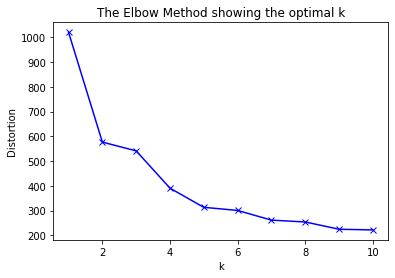

In [52]:
#Finding the optimal k for RFM table
cluster(df_latest)

In [53]:
#Fitting and predicting RFM table with optimal k
model = KMeans(n_clusters = 3)
model = model.fit(df_latest)
pred = model.predict(df_latest)

In [54]:
#Silhouette score for RFM prediction
silhouette_score(df_latest,pred)

0.5914480168569258

### Recency, Frequency, and Monetary table

In [55]:
df_latest.rename(columns = {'Num_Purchase':'Frequency', 'Days_since_last_order':'Recency', 'Orders.total':'Total Money Spent'})

,Customers.id,Num_Purchases,Recency,Total Money Spent
0,3,3.0,1573,108.72
1,4,1.0,2300,29.55
2,5,4.0,2027,124.99
3,7,1.0,2284,49.14
4,8,1.0,2270,69.70
...,...,...,...,...
3049,3730,1.0,1413,16.06
3050,3732,1.0,1413,39.99
3051,3733,1.0,1413,989.10
3052,3735,1.0,1413,129.99
